<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Calculating52wkHighlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install yfinance

In [32]:
import pandas as pd
import numpy as np
import yfinance as yf

In [33]:
ticker = pd.read_csv('/content/ind_nifty100list.csv')

In [34]:
ticker.tail(2)

,Company Name,Industry,Symbol,Series,ISIN Code
98,Wipro Ltd.,IT,WIPRO,EQ,INE075A01022
99,Yes Bank Ltd.,FINANCIAL SERVICES,YESBANK,EQ,INE528G01035


In [35]:
START = "2013-01-01"  #yyyy-mm-dd
#END = '2019-06-01'

In [36]:
#Download Data From Yahoo Finance
lst=[]
for i in range(len(ticker)):
  dfi = yf.download(str(ticker.Symbol.iloc[i])+'.ns', start=START)
   
  dfi['result']=dfi['High'].rolling(window=256, min_periods=1).max()
  dfi['result_low']=dfi['Low'].rolling(window=256, min_periods=1).min()
  dfi['high52']=np.where(dfi['High']>=dfi['result'],1,0)
  dfi['low52']=np.where(dfi['Low']<=dfi['result_low'],1,0)
  dfi = dfi.dropna()
   
  #df.head(3)
  #print('Done : '+ nifty10[i])
  #print(df.head(2))
  lst.append(dfi)

#df1.head(3)
print('\n All Completed \n')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [38]:
nlst=[]
for i in range(len(ticker)):
  nlst.append(lst[i].high52)
  nlst.append(lst[i].low52)


In [39]:
df = pd.DataFrame(nlst).T
namelist =[]
for i in range(1,len(ticker)+1):
  namelist.append('high_'+str(i))
  namelist.append('low_'+str(i))
df.columns = namelist

In [40]:
df=df[1:].fillna(0)

In [42]:
features = df.columns.tolist()

In [43]:
feats_set1=[feats for feats in features if feats.startswith('high')]

In [44]:
feats_set2=[feats for feats in features if feats.startswith('low')]

In [45]:
df_high=df[feats_set1]

In [46]:
df_low=df[feats_set2]

In [47]:
df['newhigh']=df_high.sum(axis=1)

In [48]:
df['newlow']=df_low.sum(axis=1)
                        

In [49]:
df_new=df[['newhigh','newlow']]

In [50]:
df_new.tail(2)

,newhigh,newlow
Date,,
2021-11-02,1.0,0.0
2021-11-03,4.0,0.0


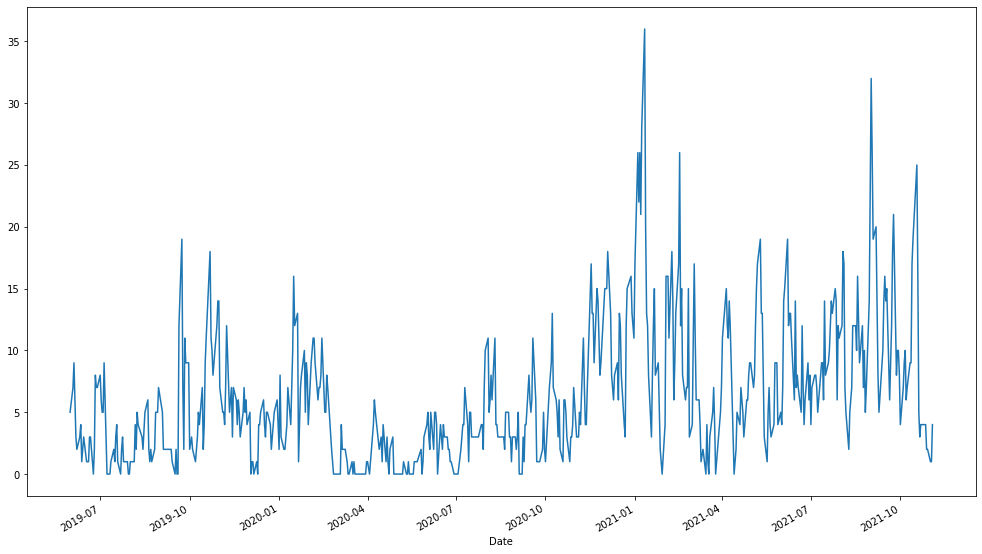

In [56]:
df_new.newhigh[-600:].plot(figsize=(17,10));

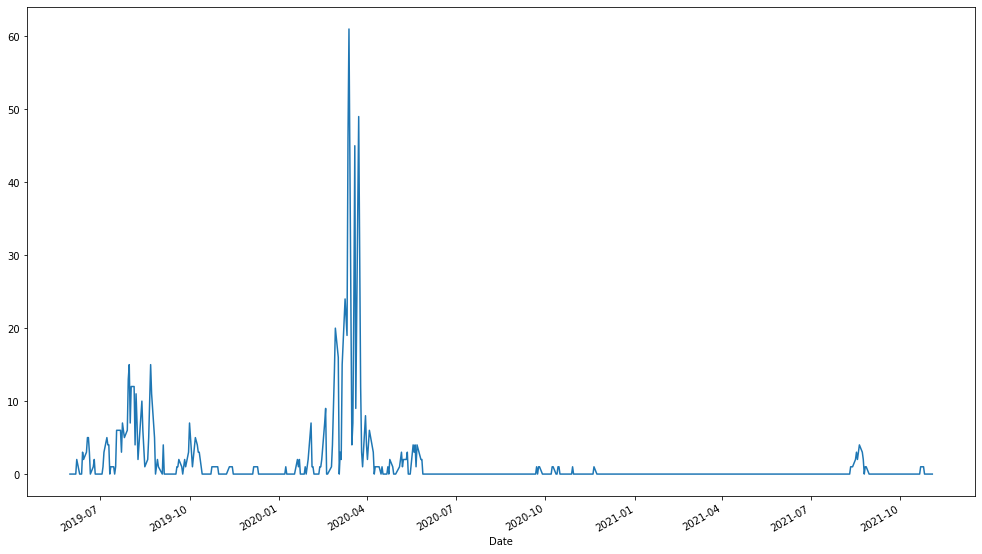

In [55]:
df_new.newlow[-600:].plot(figsize=(17,10));